In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('yellow_tripdata_2020-04.csv')

/Users/seanhensel-coe/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,1.0,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,1.0,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,1.0,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,2.0,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1.0,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5


I have created an additional row that deducts this from the total amount

In [4]:
df['total_after_surcharge'] = df['total_amount'] - df['congestion_surcharge']

In [5]:
df[['total_amount','congestion_surcharge','total_after_surcharge']].head(5)

,total_amount,congestion_surcharge,total_after_surcharge
0,6.80,0.0,6.80
1,16.55,0.0,16.55
2,14.80,2.5,12.30
3,14.80,2.5,12.30
4,13.30,2.5,10.80


Avarage fare amount

In [6]:
df['fare_amount'].mean()

11.666026899950772

Largest tip

In [7]:
df['tip_amount'].max()

117.28

Lowest tip that doesn't equal zero

In [8]:
df[df['tip_amount']>0]['tip_amount'].min()

0.01

Details of the journy with the largest tip

In [9]:
df[df['tip_amount']== df['tip_amount'].max()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,total_after_surcharge
58516,2.0,2020-04-08 17:01:14,2020-04-08 19:54:56,1.0,109.31,4.0,N,132,161,1.0,578.5,1.0,0.5,117.28,6.12,0.3,703.7,0.0,703.7


Longest distance travelled 

In [10]:
df['trip_distance'].max()

126501.77

This seems like an extremely long trip. Futher investigations shows a lot of missing information.

In [11]:
df[df['trip_distance']== df['trip_distance'].max()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,total_after_surcharge
230471,NaN,2020-04-22 20:01:00,2020-04-22 20:26:00,NaN,126501.77,NaN,NaN,159,157,NaN,28.2,0.0,0.5,0.0,6.12,0.3,35.12,0.0,35.12


In red, we can see that toward the bottom of the data frame there's a lot of missing data

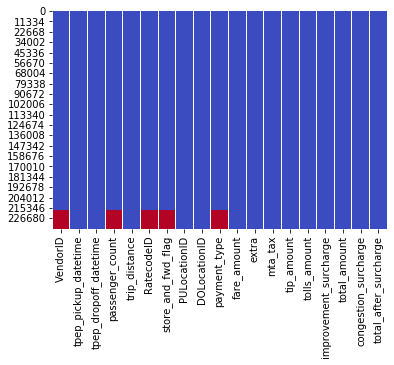

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'coolwarm')

The average tips stay roughly equal, except for 7 passengers which has a very high mean

In [13]:
df.groupby('passenger_count').mean()['tip_amount']

passenger_count
0.0     1.408441
1.0     1.516166
2.0     1.509789
3.0     1.572113
4.0     1.481837
5.0     1.508025
6.0     1.594972
7.0    12.000000
Name: tip_amount, dtype: float64

Standard Deviation on tips for single and multi passenger rides

In [14]:
df.groupby('passenger_count').std()['tip_amount']

passenger_count
0.0    1.993804
1.0    2.322593
2.0    2.248508
3.0    3.047645
4.0    2.418523
5.0    2.142085
6.0    2.280015
7.0         NaN
Name: tip_amount, dtype: float64

After counting the number of passengers per ride, we can see that this is an outlier as we only had one ride with 7 passengers 

In [15]:
df['passenger_count'].value_counts()

1.0    177793
2.0     19404
0.0      6582
5.0      4642
3.0      4553
6.0      3910
4.0      1595
7.0         1
Name: passenger_count, dtype: int64

Here's we can see visually that the number of rides with 1 passenger heavily out ways rides with multiple passengers

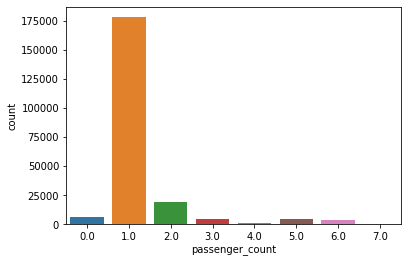

In [16]:
sns.countplot(df['passenger_count'])

Below we see the most lucrative pickup and dropoff locations.

In [17]:
print('Top 5 pickup locations. Kips Bay is the single most lucrative pickup point')
print('\n')
print(df.groupby('PULocationID').sum()['fare_amount'].sort_values(ascending=False).head(5))
print('\n')
print("Top 5 dropoff location. East Harlem South Bay is the single most lucrative dropoff point")
print('\n')
print(df.groupby('DOLocationID').sum()['fare_amount'].sort_values(ascending=False).head(5))

Top 5 pickup locations. Kips Bay is the single most lucrative pickup point


PULocationID
137    189767.22
140    122775.91
75     106124.99
238     97317.58
263     84793.20
Name: fare_amount, dtype: float64


Top 5 dropoff location. East Harlem South Bay is the single most lucrative dropoff point


DOLocationID
75     94579.70
137    78401.37
74     75041.89
140    70688.09
238    66528.27
Name: fare_amount, dtype: float64


We can see that the most lucrative pickup and dropoff spots are also the most frequented.

In [20]:
print(df['PULocationID'].value_counts().sort_values(ascending=False).head(5))
print('\n')
print(df['DOLocationID'].value_counts().sort_values(ascending=False).head(5))

137    12006
140    10675
75     10269
238    10210
263     9522
Name: PULocationID, dtype: int64


75     10794
140     8232
236     8177
238     7839
74      7632
Name: DOLocationID, dtype: int64


Here I'm creating a new column for Date by seporating DateTime

In [15]:
df['date'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.date

Total amount by each day. I've dropped the first row as it links to a ride in 2009, this seemed irrelevant and could skew the data.

In [29]:
total_per_day = df.groupby('date')['total_amount'].sum()

In [30]:
new_df = pd.DataFrame(total_per_day).reset_index()
new_df.drop(0, inplace = True)

In [31]:
new_df

,date,total_amount
1,2020-02-02,128.76
2,2020-02-03,444.78
3,2020-02-04,131.05
4,2020-02-05,234.12
5,2020-02-06,308.12
6,2020-02-07,157.44
7,2020-03-07,191.76
8,2020-03-08,270.69
9,2020-03-09,255.13
10,2020-03-10,158.30


Line graph illustrating the peaks and troughs between March 2020 and April 2020.

In [46]:
x = new_df['date']
y = new_df['total_amount']

Text(0, 0.5, 'Total Amount')

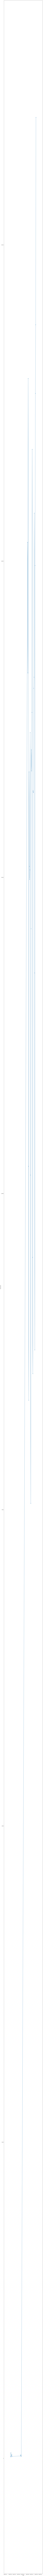

In [47]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,1.50,150])
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Total Amount')

Here I've drawn a regression for fare amounts and tips amounts. This visualisation demonstrates that overall, as the ride fairs increase tip amounts generally increases.

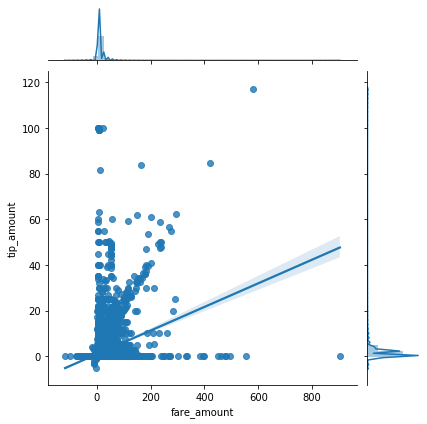

In [34]:
sns.jointplot(x = 'fare_amount', y = 'tip_amount', data = df, kind = 'reg')

This same correlation is demonstrated here

In [45]:
df[['trip_distance','fare_amount']].corr()

,trip_distance,fare_amount
trip_distance,1.000000,0.018077
fare_amount,0.018077,1.000000


However, there is less correlation between trip distance and tip amount. So longer rides aren't necessarily the most lucrative.

In [46]:
df[['trip_distance','tip_amount']].corr()

,trip_distance,tip_amount
trip_distance,1.00000,0.00233
tip_amount,0.00233,1.00000


Looking at how other monetary values correlate, we can see in red and warmer colours below that the most highly correlated features of this data is Fare Amount and Total Amount, followed by Tip Amount. Extra and Passenger Count being among the least correlated.

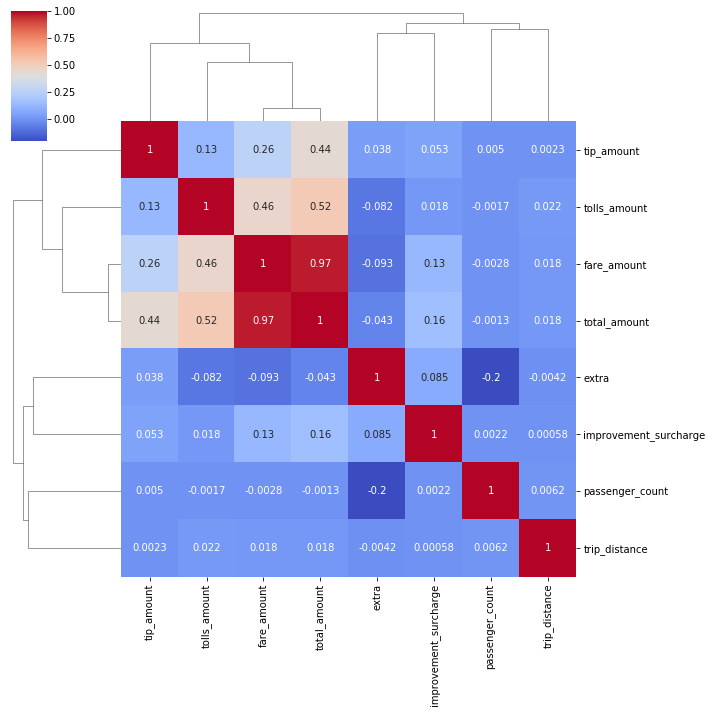

In [41]:

new_df2 = df[['passenger_count','trip_distance','fare_amount','extra','tip_amount','tolls_amount','improvement_surcharge','total_amount']]
c = new_df2.corr()
sns.clustermap(c, annot = True, cmap = 'coolwarm')

Here we see that card payments are the most popular payment type

In [58]:
df['payment_type'].value_counts().head(5)

1.0    131151
2.0     83038
3.0      2910
4.0      1381
Name: payment_type, dtype: int64

This point is illustrated here

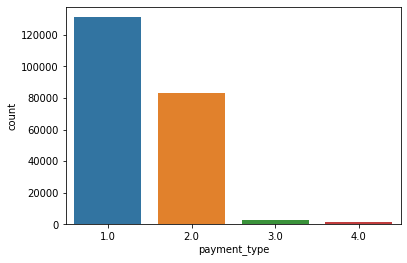

In [254]:
sns.countplot(df['payment_type'])

The average tip amount is much higher when passengers pay by card

In [49]:
df.groupby('payment_type')['tip_amount'].mean()

payment_type
1.0    2.522639
2.0    0.000166
3.0    0.007780
4.0    0.012201
Name: tip_amount, dtype: float64

143 passengers who paid by card tip over 100 dollars 

In [61]:
df[(df['payment_type']==1) & (df['fare_amount']>100)].count()

VendorID                 143
tpep_pickup_datetime     143
tpep_dropoff_datetime    143
passenger_count          143
trip_distance            143
RatecodeID               143
store_and_fwd_flag       143
PULocationID             143
DOLocationID             143
payment_type             143
fare_amount              143
extra                    143
mta_tax                  143
tip_amount               143
tolls_amount             143
improvement_surcharge    143
total_amount             143
congestion_surcharge     143
date                     143
dtype: int64